In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

import fastf1
import fastf1.plotting

import os
import time

fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')


In [6]:
def show_laptime_scatterplot(team_drivers, session):
    driver_1_laps = session.laps.pick_drivers(team_drivers[0]).pick_laps(range(0, (int(max(session.laps['LapNumber']))+1))).reset_index()
    driver_2_laps = session.laps.pick_drivers(team_drivers[1]).pick_laps(range(0, (int(max(session.laps['LapNumber']))+1))).reset_index()
    driver_1_laps.loc[0, 'LapTime'] = driver_1_laps.loc[1, 'LapStartTime'] - driver_1_laps.loc[0, 'LapStartTime']
    driver_2_laps.loc[0, 'LapTime'] = driver_2_laps.loc[1, 'LapStartTime'] - driver_2_laps.loc[0, 'LapStartTime']
    
    if driver_1_laps.empty:
        min_laptime = min(driver_2_laps['LapTime'])
        max_laptime = max(driver_2_laps['LapTime'])
    elif driver_2_laps.empty:
        min_laptime = min(driver_1_laps['LapTime'])
        max_laptime = max(driver_1_laps['LapTime'])
    else:
        min_laptime = min(min(driver_1_laps['LapTime']), min(driver_2_laps['LapTime']))
        max_laptime = max(max(driver_1_laps['LapTime']), max(driver_2_laps['LapTime']))
    
    min_laptime = min_laptime - \
                        timedelta(seconds= 1)
    max_laptime = max_laptime + \
                        timedelta(seconds= 1)
    
    last_lap = int(max(session.laps['LapNumber'])) + 1
    
    fig, ax = plt.subplots(figsize=(5.75, 4.2))
    
    sns.scatterplot(data=driver_1_laps,
                    x="LapNumber",
                    y="LapTime",
                    hue = 'Compound',
                    palette=fastf1.plotting.get_compound_mapping(session=session),
                    edgecolor = team_color,
                    style="Compound",
                    s=50,
                    linewidth=0.5)
    
    sns.scatterplot(data=driver_2_laps,
                    x="LapNumber",
                    y="LapTime",
                    hue = 'Compound',
                    palette=fastf1.plotting.get_compound_mapping(session=session),
                    edgecolor = team_color_2,
                    style="Compound",
                    s=50,
                    linewidth=0.5)
    
    ax.invert_yaxis()
    ax.tick_params(labelleft=False)
    ax.set_xlim([0, last_lap])
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.set_ylim([min_laptime, max_laptime])
    plt.tick_params(left = False)
    plt.tick_params(bottom = False)
    plt.legend(frameon=False)
    plt.grid(color='w', which='major', axis='both', linestyle='dotted')

    plt.tight_layout()


core           INFO 	Loading data for Australian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 4 completed the race distance 00:00.022000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '63', '12', '23', '18', '27', '16', '81', '44', '10', 

No data for Alpine


/tmp/ipykernel_4315/2111855104.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  team_color_2 = df_color.loc[team][0]
/tmp/ipykernel_4315/2111855104.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  team_color_2 = df_color.loc[team][0]
/tmp/ipykernel_4315/2111855104.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  team_color_2 = df_color.loc[team][0]
/tmp/ipykernel_4315/2111855104.py:23: FutureWarning: Series.__getitem__ t

No data for Racing Bulls
No data for Williams


/tmp/ipykernel_4315/2111855104.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  team_color_2 = df_color.loc[team][0]


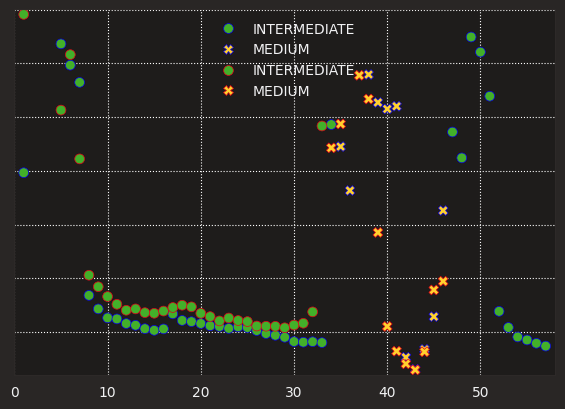

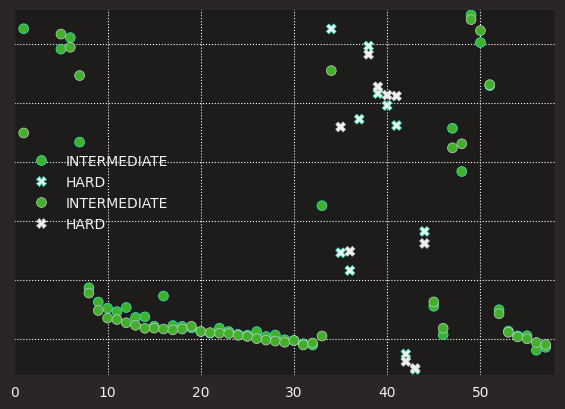

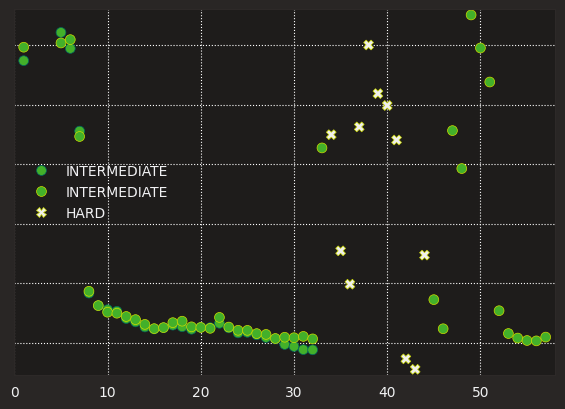

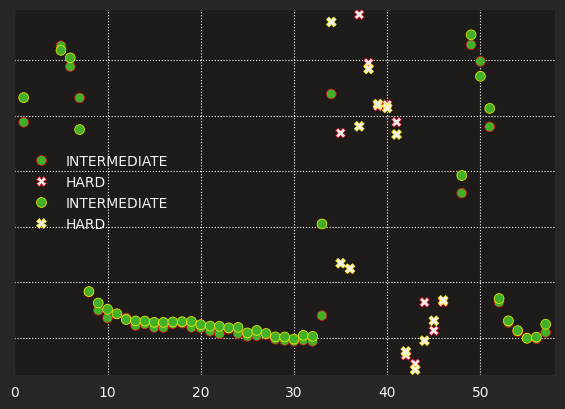

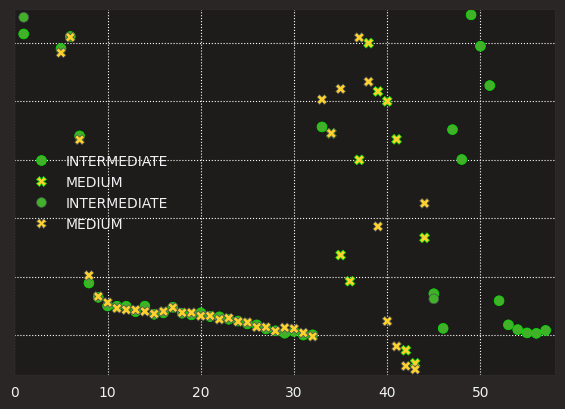

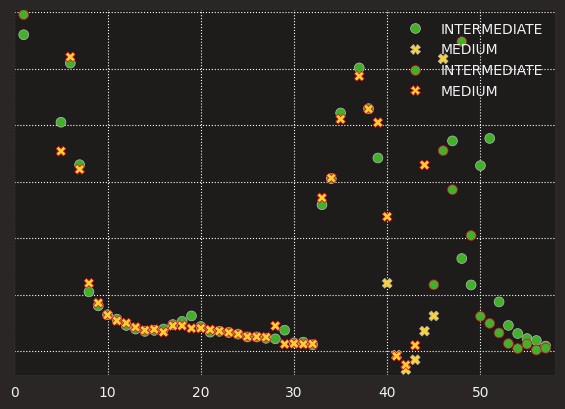

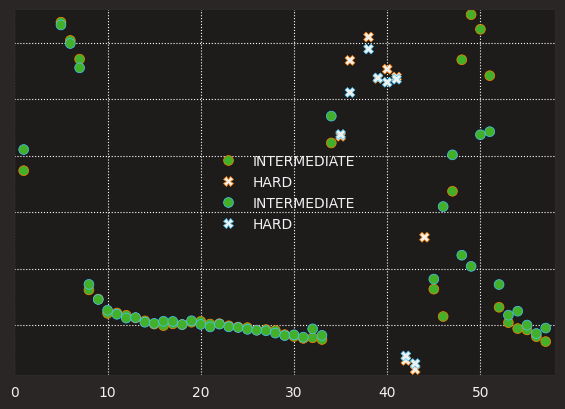

In [ ]:
#year = int(input('Year ? '))
#race_number = int(input('Race Number ? '))
#race_session = input('Session ? ')

year = 2025
race_number = 1
race_session = 'R'

session = fastf1.get_session(year, race_number, race_session)
session.load()

event_name = session.event.EventName
circuit_info = session.get_circuit_info()

start_time = time.time()
event_name = session.event.EventName
teams = fastf1.plotting.list_team_names(session)

for idx,team in enumerate(teams):
    team_drivers = fastf1.plotting.get_driver_abbreviations_by_team(team, session=session)
    team_color = fastf1.plotting.get_team_color(team, session=session)
    df_color=pd.read_csv("../data/raw/second_color.csv", index_col='team')
    team_color_2 = df_color.iat[idx,0]
    try:
        show_laptime_scatterplot(team_drivers, session)
    except:
        print(f'No data for {team}')